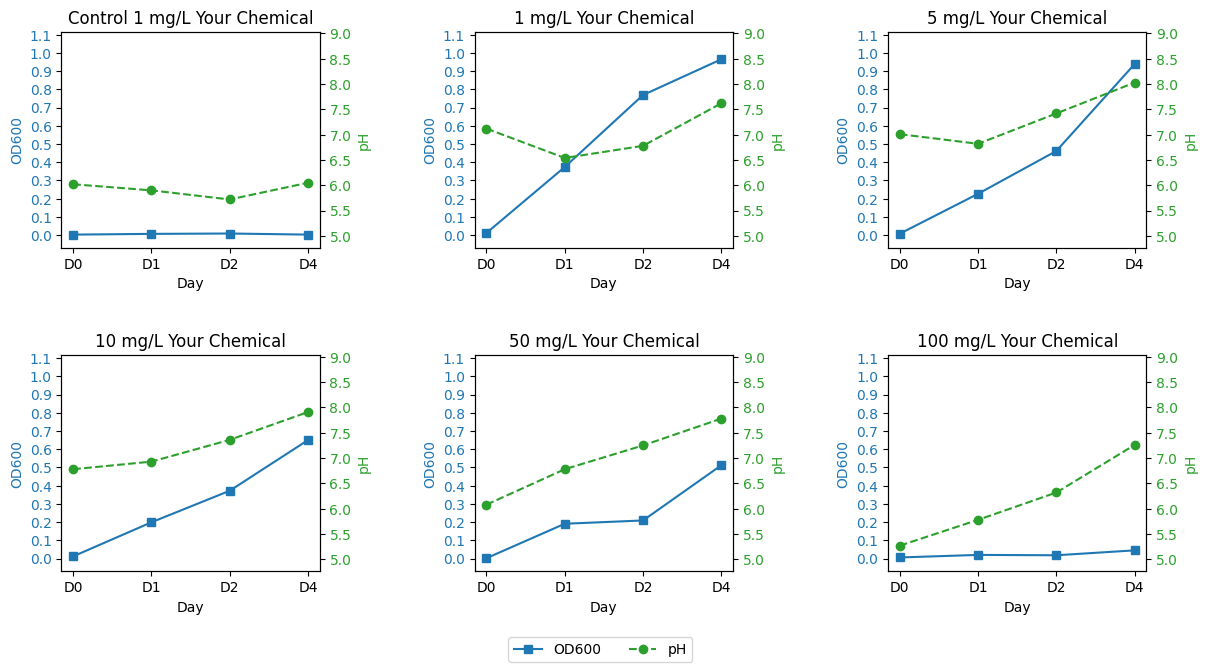

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

### Upload Data
od600_df = pd.read_csv('path_to_Subplot_OD600_Test_file.csv')
ph_df = pd.read_csv('path_to_Subplot_pH_Test_file.csv')

### Subplot Display
# This is set to show 2 rows of 3 graphs each, so this would be a decent setup for 6 graphics. 
number_columns = 3
number_rows = 2

### Math for Axes Scaling 
min_ph = ph_df.iloc[:, 1:].values.min() - 0.5
max_ph = ph_df.iloc[:, 1:].values.max() + 0.5
min_OD = od600_df.iloc[:, 1:].values.min() - 0.05
max_OD = od600_df.iloc[:, 1:].values.max() + 0.05

### Subplot Parameters with GridSpec
# figure size is W x H 
fig = plt.figure(figsize=(14, 7))
gs = gridspec.GridSpec(number_rows, number_columns)

### Loop for Subplot creation
for i, sample in enumerate(od600_df['Sample']):
    ### Indexing 
    row_index = i // number_columns
    col_index = i % number_columns
    
    ### Create the plot
    ax1 = plt.subplot(gs[row_index, col_index])
    
    ### Left Y Axis, OD600 
    ax1.plot(od600_df.columns[1:], od600_df.iloc[i, 1:], linestyle='-', marker='s', label='OD600', color='tab:blue')
    ax1.set_xlabel('Day')
    ax1.set_ylabel('OD600', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.set_title(f'{sample} mg/L Your Chemical')
    ax1.set_ylim(min_OD -0.02, max_OD + 0.1)  
    ax1.yaxis.set_major_locator(plt.MultipleLocator(0.1))
    
    ### Right Y Axis, pH 
    ax2 = ax1.twinx()
    ax2.plot(ph_df.columns[1:], ph_df.iloc[i, 1:], linestyle='--', marker='o', label='pH', color='tab:green')
    ax2.set_ylabel('pH', color='tab:green')
    ax2.tick_params(axis='y', labelcolor='tab:green')
    ax2.set_ylim(min_ph, max_ph + 0.5) 
    ax2.yaxis.set_major_locator(plt.MultipleLocator(0.5))

### Manual Legend Creation
legend_elements = [
    plt.Line2D([0], [0], color='tab:blue', linestyle='-', marker='s', label='OD600'),
    plt.Line2D([0], [0], color='tab:green', linestyle='--', marker='o', label='pH')
]

### Move the Legend
fig.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.51, -0.03), ncol=2)

### Subplot Spacing, editable 
plt.subplots_adjust(hspace=0.5, wspace=0.6)

# Show plot
plt.show()